In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
df_trips = pd.read_csv("divvy_trips.csv")
df_stations = pd.read_csv("divvy_stations.csv")

In [3]:
# Display first few rows
print(df_trips.head())
print(df_stations.head())

            ride_id  rideable_type           started_at             ended_at  \
0  0A1B623926EF4E16    docked_bike  2021-07-02 14:44:36  2021-07-02 15:19:58   
1  B2D5583A5A5E76EE   classic_bike  2021-07-07 16:57:42  2021-07-07 17:16:09   
2  6F264597DDBF427A   classic_bike  2021-07-25 11:30:55  2021-07-25 11:48:45   
3  379B58EAB20E8AA5   classic_bike  2021-07-08 22:08:30  2021-07-08 22:23:32   
4  6615C1E4EB08E8FB  electric_bike  2021-07-28 16:08:06  2021-07-28 16:27:09   

             start_station_name start_station_id  \
0  Michigan Ave & Washington St            13001   
1    California Ave & Cortez St            17660   
2          Wabash Ave & 16th St           SL-012   
3    California Ave & Cortez St            17660   
4    California Ave & Cortez St            17660   

                 end_station_name end_station_id  start_lat  start_lng  \
0    Halsted St & North Branch St   KA1504000117  41.883984 -87.624684   
1            Wood St & Hubbard St          13432  41.90036

In [4]:
print(df_trips.info())  # Column types, missing values
print(df_stations.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822410 entries, 0 to 822409
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             822410 non-null  object 
 1   rideable_type       822410 non-null  object 
 2   started_at          822410 non-null  object 
 3   ended_at            822410 non-null  object 
 4   start_station_name  735147 non-null  object 
 5   start_station_id    735148 non-null  object 
 6   end_station_name    729252 non-null  object 
 7   end_station_id      729252 non-null  object 
 8   start_lat           822410 non-null  float64
 9   start_lng           822410 non-null  float64
 10  end_lat             821679 non-null  float64
 11  end_lng             821679 non-null  float64
 12  member_casual       822410 non-null  object 
dtypes: float64(4), object(9)
memory usage: 81.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data co

In [5]:
print(df_trips.columns)
print(df_stations.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
Index(['ID', 'Station Name', 'Short Name', 'Total Docks', 'Docks in Service',
       'Status', 'Latitude', 'Longitude', 'Location'],
      dtype='object')


In [6]:
print(df_trips.describe())
print(df_stations.describe())

           start_lat      start_lng        end_lat        end_lng
count  822410.000000  822410.000000  821679.000000  821679.000000
mean       41.903565     -87.645536      41.903815     -87.645662
std         0.043153       0.026856       0.043289       0.027065
min        41.648501     -87.840000      41.630000     -87.850000
25%        41.883380     -87.659660      41.883380     -87.659753
50%        41.900219     -87.641170      41.900960     -87.641170
75%        41.929143     -87.627691      41.929505     -87.627680
max        42.070000     -87.520000      42.150000     -87.490000
       Total Docks  Docks in Service     Latitude    Longitude
count  1041.000000       1041.000000  1041.000000  1041.000000
mean     15.730067         15.728146    41.866644   -87.670416
std       6.889593          6.887144     0.087094     0.054468
min       1.000000          1.000000    41.648501   -87.836740
25%      11.000000         11.000000    41.800434   -87.704010
50%      15.000000         1

In [7]:
print(df_trips.isnull().sum())  # Count missing values per column
print(df_stations.isnull().sum())  

print(df_trips.duplicated().sum())  # Count duplicate rows
print(df_stations.duplicated().sum())  

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    87263
start_station_id      87262
end_station_name      93158
end_station_id        93158
start_lat                 0
start_lng                 0
end_lat                 731
end_lng                 731
member_casual             0
dtype: int64
ID                   0
Station Name         0
Short Name          99
Total Docks          0
Docks in Service     0
Status               0
Latitude             0
Longitude            0
Location             0
dtype: int64
0
0


Cleaning Data

In [8]:
df_trips = df_trips.drop_duplicates()
df_stations = df_stations.drop_duplicates()

In [9]:
df_trips["start_station_name"].fillna("Unknown", inplace=True)
df_trips["end_station_name"].fillna("Unknown", inplace=True)

In [10]:
df_trips["ride_length"] = (pd.to_datetime(df_trips["ended_at"]) - pd.to_datetime(df_trips["started_at"])).dt.total_seconds() / 60
df_trips = df_trips[df_trips["ride_length"] > 0]  # Remove invalid negative rides

In [11]:
# Standardize column names by removing spaces and converting to lowercase
df_stations.columns = df_stations.columns.str.strip().str.lower().str.replace(" ", "_")

# Check if column names are now clean
print(df_stations.columns)

Index(['id', 'station_name', 'short_name', 'total_docks', 'docks_in_service',
       'status', 'latitude', 'longitude', 'location'],
      dtype='object')


In [12]:
df_trips.rename(columns={"start_station_name": "station_name"}, inplace=True)

In [13]:
df_trips = df_trips.merge(df_stations, on="station_name", how="left")

In [14]:
print(df_trips[["station_name", "latitude", "longitude"]].head())

                   station_name   latitude  longitude
0  Michigan Ave & Washington St  41.883984 -87.624684
1    California Ave & Cortez St  41.900363 -87.696704
2          Wabash Ave & 16th St  41.860384 -87.625813
3    California Ave & Cortez St  41.900363 -87.696704
4    California Ave & Cortez St  41.900363 -87.696704


In [15]:
print(df_trips.isnull().sum())

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
station_name             0
start_station_id     87261
end_station_name         0
end_station_id       93202
start_lat                0
start_lng                0
end_lat                732
end_lng                732
member_casual            0
ride_length              0
id                  133661
short_name          134397
total_docks         133661
docks_in_service    133661
status              133661
latitude            133661
longitude           133661
location            133661
dtype: int64


In [16]:
df_trips.dropna(subset=["latitude", "longitude"], inplace=True)

In [17]:
df_trips.to_csv("cleaned_cyclistic_data.csv", index=False)

In [18]:
df_map = df_trips[["station_name", "latitude", "longitude", "ride_id"]]
df_map.to_csv("map_data.csv", index=False)

Feature Engineering

In [19]:
df_trips["started_at"] = pd.to_datetime(df_trips["started_at"])
df_trips["ended_at"] = pd.to_datetime(df_trips["ended_at"])

In [20]:
df_trips["day_of_week"] = df_trips["started_at"].dt.day_name()
df_trips["hour_of_day"] = df_trips["started_at"].dt.hour
df_trips["month"] = df_trips["started_at"].dt.month_name()

In [21]:
df_trips["day_of_week"] = df_trips["started_at"].dt.day_name()
df_trips["hour_of_day"] = df_trips["started_at"].dt.hour
df_trips["month"] = df_trips["started_at"].dt.month_name()

In [22]:
bins = [0, 10, 30, 120]  # Short, Medium, Long Rides
labels = ["Short (<10 min)", "Medium (10-30 min)", "Long (>30 min)"]
df_trips["ride_category"] = pd.cut(df_trips["ride_length"], bins=bins, labels=labels, include_lowest=True)

Exploratory Data Analysis (EDA)

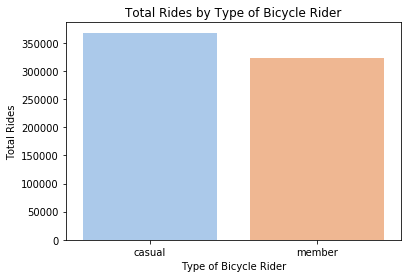

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x="member_casual", data=df_trips, palette="pastel")
plt.title("Total Rides by Type of Bicycle Rider")
plt.xlabel("Type of Bicycle Rider")
plt.ylabel("Total Rides")
plt.show()

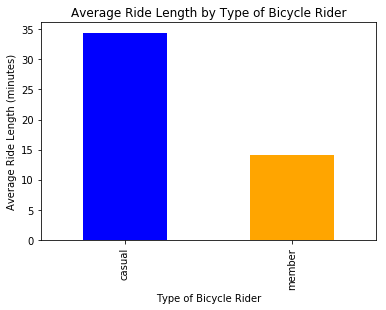

In [24]:
df_trips.groupby("member_casual")["ride_length"].mean().plot(kind="bar", figsize=(6,4), color=["blue", "orange"])
plt.title("Average Ride Length by Type of Bicycle Rider")
plt.xlabel("Type of Bicycle Rider")
plt.ylabel("Average Ride Length (minutes)")
plt.show()

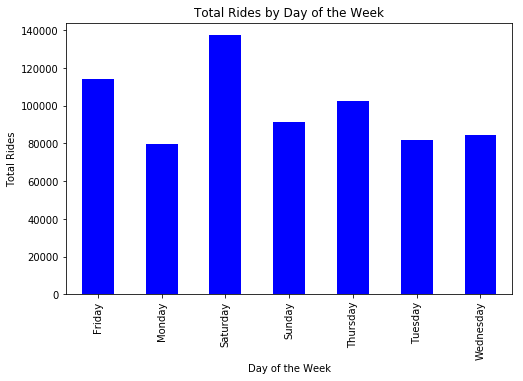

In [25]:
df_trips.groupby("day_of_week")["ride_id"].count().plot(kind="bar", figsize=(8,5), color="blue")
plt.title("Total Rides by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Rides")
plt.show()

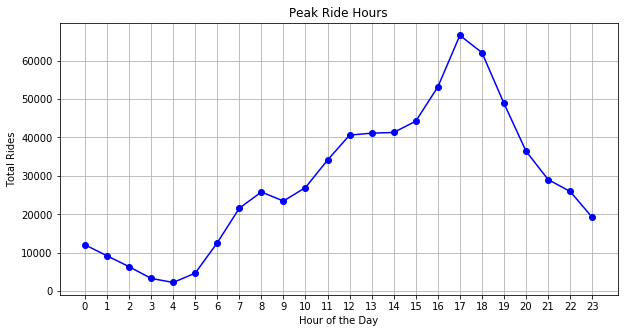

In [26]:
df_trips.groupby("hour_of_day")["ride_id"].count().plot(kind="line", marker="o", figsize=(10,5), color="blue")
plt.title("Peak Ride Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rides")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

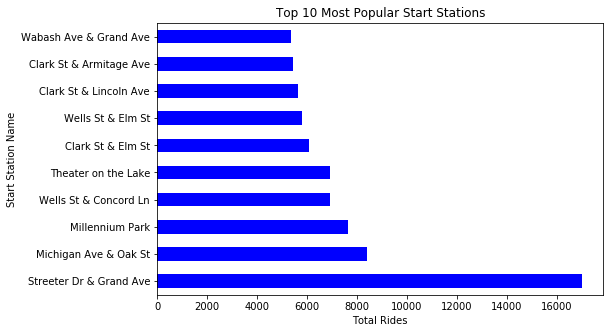

In [29]:
df_trips["station_name"].value_counts().head(10).plot(kind="barh", figsize=(8,5), color="blue")
plt.title("Top 10 Most Popular Start Stations")
plt.xlabel("Total Rides")
plt.ylabel("Start Station Name")
plt.show()

Prepare for Dashboard Development

In [30]:
df_dashboard = df_trips[["ride_id", "member_casual", "ride_length", "day_of_week", "hour_of_day", "month", "station_name", "latitude", "longitude"]]
df_dashboard.to_csv("dashboard_data.csv", index=False)